In [7]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df = df[df['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]
df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


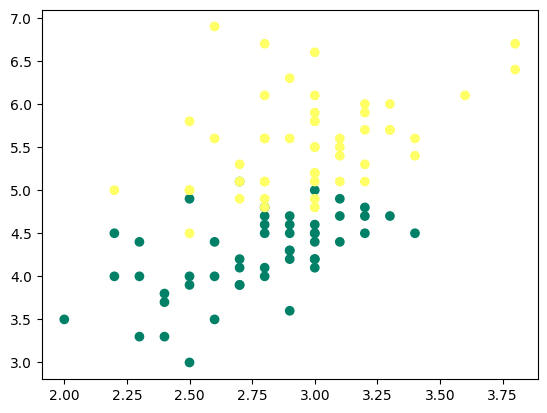

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['Species'],cmap='summer')

In [13]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),Species
53,2.3,4.0,1
54,2.8,4.6,1
89,2.5,4.0,1
104,3.0,5.8,2
100,3.3,6.0,2
66,3.0,4.5,1
97,2.9,4.3,1
61,3.0,4.2,1
71,2.8,4.0,1
105,3.0,6.6,2


In [14]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [16]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
125,3.2,6.0,2
89,2.5,4.0,1
125,3.2,6.0,2
125,3.2,6.0,2
125,3.2,6.0,2
89,2.5,4.0,1
98,2.5,3.0,1
98,2.5,3.0,1


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [19]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    fig = plt.figure(figsize=(10, 8))
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    plt.xlabel('sepal width (cm)')
    plt.ylabel('petal length (cm)')
    plt.title('Decision Boundary')
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.4


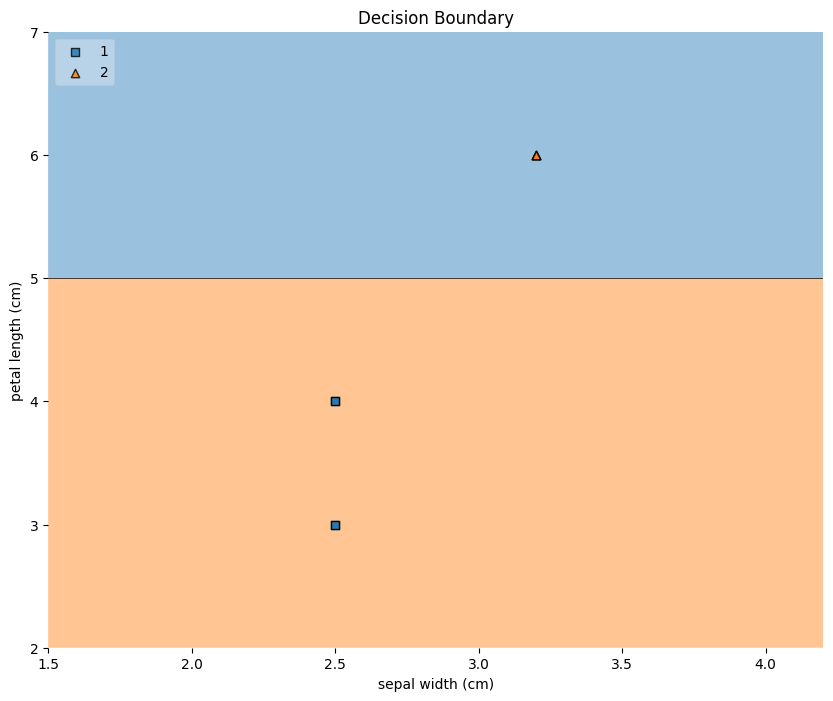

In [20]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [21]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
89,2.5,4.0,1
117,3.8,6.7,2
143,3.2,5.9,2
89,2.5,4.0,1
126,2.8,4.8,2
91,3.0,4.6,1
69,2.5,3.9,1
68,2.2,4.5,1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6


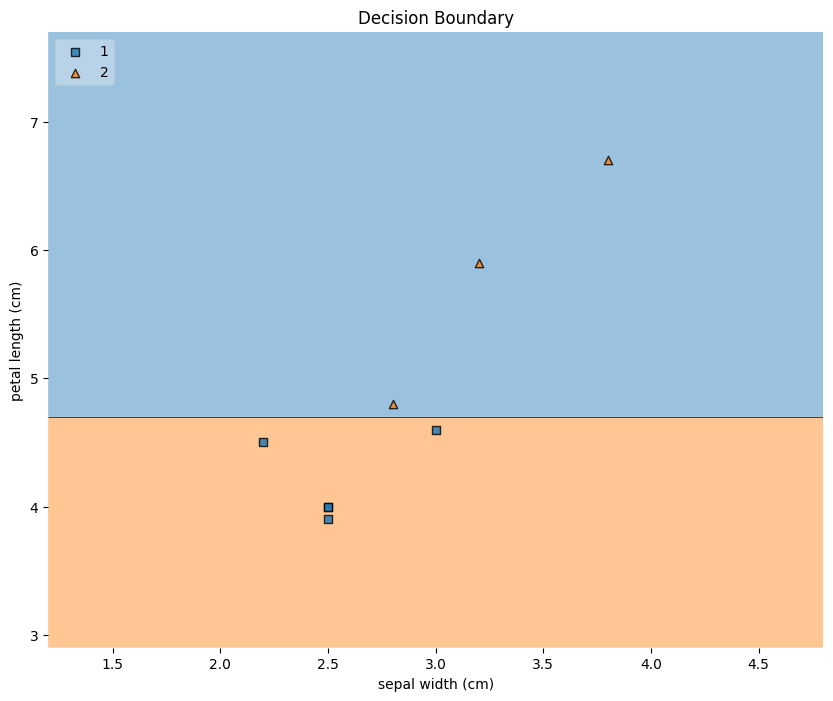

In [22]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [23]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
89,2.5,4.0,1
69,2.5,3.9,1
91,3.0,4.6,1
68,2.2,4.5,1
89,2.5,4.0,1
89,2.5,4.0,1
126,2.8,4.8,2
68,2.2,4.5,1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6


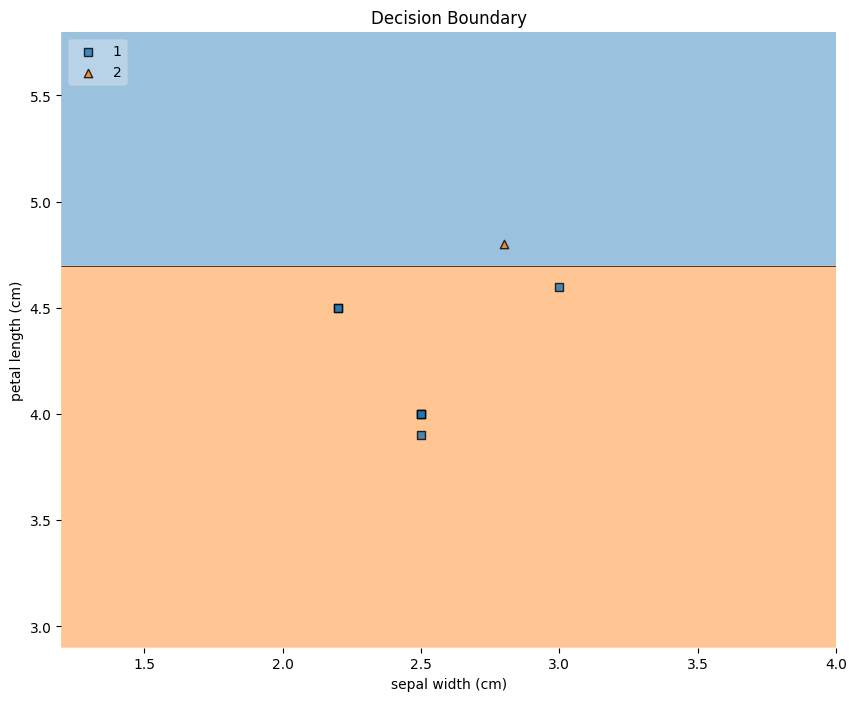

In [24]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [27]:
df_test

,sepal width (cm),petal length (cm),Species
140,3.1,5.6,2
71,2.8,4.0,1
113,2.5,5.0,2
72,2.5,4.9,1
109,3.6,6.1,2


In [29]:
import numpy as np
print("Predictor 1",dt_bag1.predict(np.array([3.1,	5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.1,	5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,	5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
